# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [9]:
#%pip install --upgrade plotly

###  Import Statements


In [10]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [11]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [12]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [13]:
#2000 rows 96 columns
#df_data.shape

(2000, 96)

In [14]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [25]:
df_data.isna().sum().loc[lambda x : x>0]
#It seems i have nan values in a bunch of coluns
# df_data['PRMONF'].isna().value_counts()

AGEMBTH       44
HHINC97      370
POVRAT97     373
PRMONM       879
PRMONF      1073
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
PRFSTYUN     790
PRFSTYPE     790
PRFSTYAN     790
PRFSTYAE     790
SFR          399
SMR           82
JOBS          47
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [29]:
# lets think which rows i should check for duplicates
df_data = df_data.drop_duplicates()
duplicates = df_data.duplicated()
#Seems a general row duplicate worked and removed quite a lot of rows
duplicates.value_counts()
#df_data.isna().sum().loc[lambda x : x>0]



AGEMBTH      34
HHINC97     282
POVRAT97    284
PRMONM      636
PRMONF      789
PRMSTYUN    387
PRMSTYPE    387
PRMSTYAN    387
PRMSTYAE    387
PRFSTYUN    583
PRFSTYPE    583
PRFSTYAN    583
PRFSTYAE    583
SFR         290
SMR          57
JOBS         38
dtype: int64

## Descriptive Statistics

In [35]:

df_data.drop('ID',axis=1,inplace=True)
df_data.describe()
#S, EXP, EARNINGS are the key features

,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00","1,203.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",362.26,...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",294.23,...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",190.50,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",302.00,...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",441.00,...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00","1,627.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

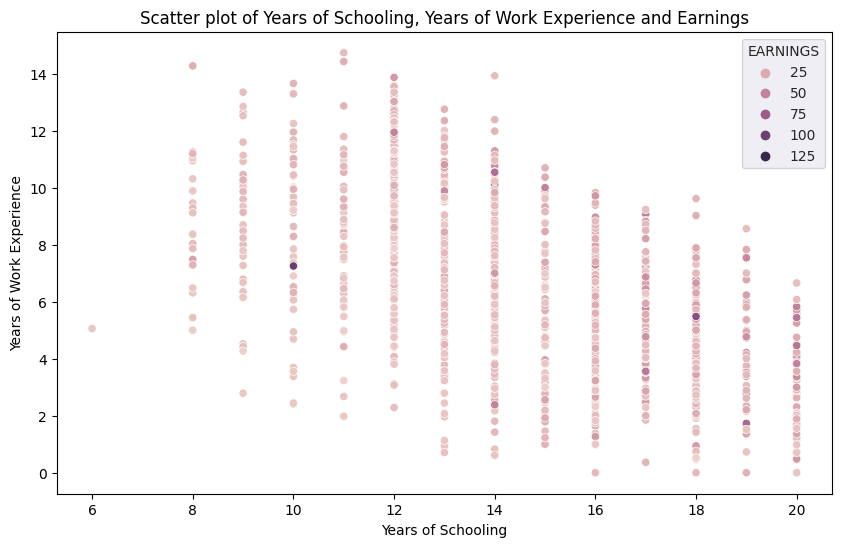

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
with sns.axes_style("darkgrid"):
    sns.scatterplot(x='S', y='EXP', hue='EARNINGS', data=df_data, ax=ax)
plt.title('Scatter plot of Years of Schooling, Years of Work Experience and Earnings')
plt.xlabel("Years of Schooling")
plt.ylabel("Years of Work Experience")
plt.show()

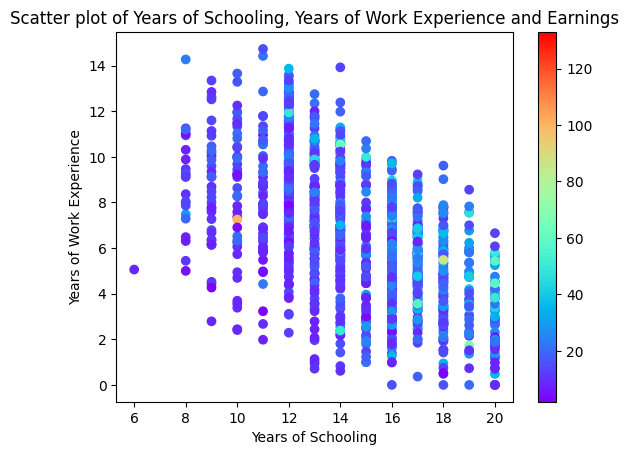

In [37]:
x = df_data['S']
y = df_data['EXP']
z = df_data['EARNINGS']

plt.scatter(x, y, c=z, cmap='rainbow')
plt.xlabel('Years of Schooling')
plt.ylabel('Years of Work Experience')
plt.title('Scatter plot of Years of Schooling, Years of Work Experience and Earnings')
plt.colorbar()
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [40]:
X = df_data.drop(columns=['EARNINGS'])
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [48]:
# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data using only the "Schooling" feature
model.fit(X_train[['S']], y_train)

# Make predictions on the test data
y_pred = model.predict(X_test[['S']])

1428   14.57
978    13.32
939    12.11
411    22.00
631     9.50
        ... 
1219   17.86
1556   28.72
860    13.50
1921   10.50
1213   15.45
Name: EARNINGS, Length: 1189, dtype: float64

In [45]:
R_2 = model.score(X_test[['S']], y_test)
print("R^2: ", R_2)
print(model.coef_)
print(model.intercept_)


R^2:  0.06095719119722398
[1.27071624]
0.2828911861436012


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
#With a coef of 1.27 it means we get 1270 additional dollars per year of schooling
#The row r squared this model is not worth much as the correlation is only 0.06 and we need additional data

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

<AxesSubplot: ylabel='EARNINGS'>

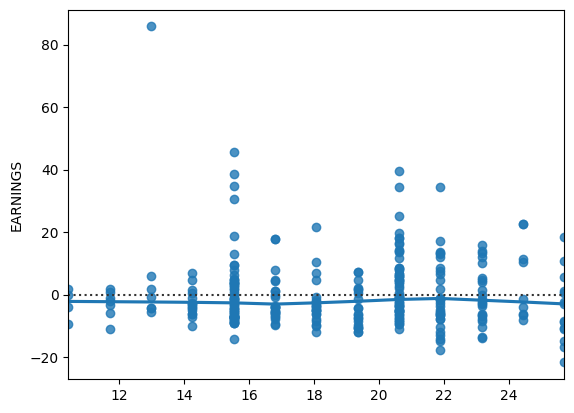

In [50]:
residuals = y_test - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True)


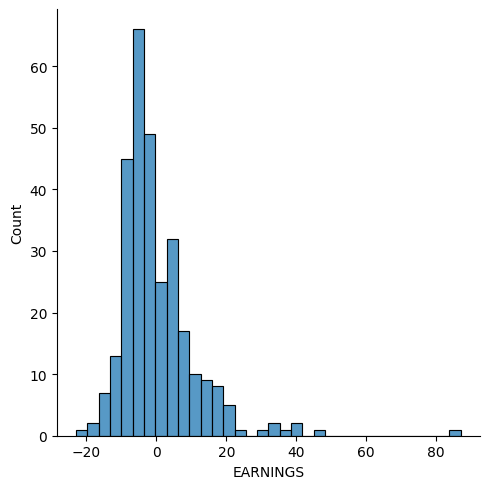

In [52]:
sns.displot(residuals)


In [55]:
sns.lmplot(x=y_pred, y=residuals, lowess=True)


TypeError: Missing required keyword argument `data`.

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [65]:
# Assign the features and target variables
X = df_data[['S','EXP']]
y = df_data['EARNINGS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
y_pred

array([17.47185148, 15.99546137, 16.69692999, 25.53021578, 23.50460299,
       23.58339803, 21.69935083, 17.00142187, 13.99189201, 20.61459629,
       23.33332606, 16.07425344, 22.18881143, 20.42695945, 26.67206131,
       21.67231056, 23.23016283, 11.60469537, 15.65290752, 20.42161927,
       19.19529519, 17.57234463, 25.459432  , 21.17751076, 25.73955369,
       16.4441909 , 26.31314655, 19.8179747 , 23.25720309, 17.8250857 ,
       23.44484092, 14.24997029, 19.83700569, 23.58072596, 15.52236167,
       19.67106498, 24.4698324 , 22.21886314, 20.04100442, 21.37048778,
       27.83560791, 23.43683164, 25.17664021, 20.31010441, 17.4174286 ,
       16.12867632, 17.72192147, 25.53021578, 21.58249678, 19.13553708,
       18.59466602, 17.15900798, 15.2151997 , 21.64492399, 17.56700544,
       23.235503  , 21.53340913, 19.94051127, 19.92681947, 23.25987813,
       15.4625996 , 19.32317491, 20.64731908, 21.59885669, 14.43760911,
       12.99127071, 17.8441157 , 19.92415037, 19.78525488, 19.43

In [66]:
print(f"Coefficient:{model.coef_}")
print(f"Intercept:{model.intercept_}")
R_2 = model.score(X_test, y_test)
print(f"R-Squared:{R_2}")
#The coefs seems good

Coefficient:[1.84331414 0.98959959]
Intercept:-14.647419747297569
R-Squared:0.07313839297805502


### Evaluate the Coefficients of the Model

In [ ]:
#Again we are getting a low r squared so we need to add more variables

### Analyse the Estimated Values & Regression Residuals

<AxesSubplot: ylabel='EARNINGS'>

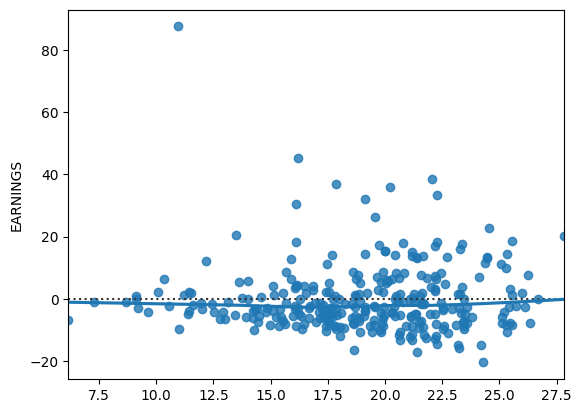

In [67]:
residuals2 = y_test - y_pred

sns.residplot(x=y_pred, y=residuals2, lowess=True)

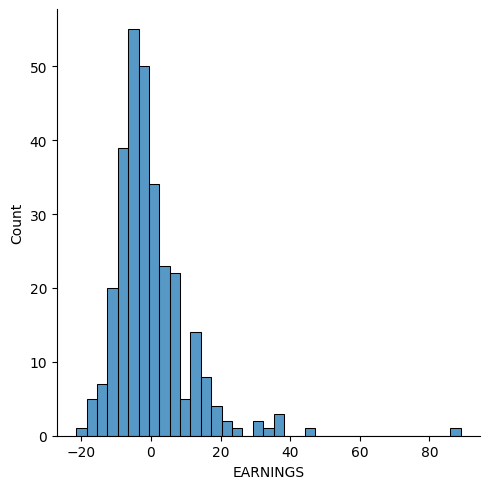

In [68]:
sns.displot(residuals2)


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [70]:
import pandas as pd
# Create a new DataFrame with column names that match the feature names used when the model was trained
new_observation = pd.DataFrame({'S':[16], 'EXP':[5]})

# Use the model to make a prediction
prediction = model.predict(new_observation)
print(prediction)



[19.79360452]


In [ ]:
#The prediction gives me 19.8 probably thousands a year which seems low

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [ ]:
SINGLE,D,"Single, never married"
MARRIED,D,"Married, spouse present"
COHABIT,D,Cohabiting
OTHSING,D,Other single

ETHBLACK,D,Black
ETHHISP,D,Hispanic
ETHWHITE,D,"Non-black, non-hispanic"

HHINC97,C,"Gross household income, $, in year prior to 1997 interview"
POVRAT97,C,"Ratio of household income to poverty level, 1997"

In [74]:
# Select the columns for the independent variables
X = df_data[['S','EXP','SINGLE','MARRIED','COHABIT','OTHSING','ETHBLACK','ETHHISP','ETHWHITE']]
# Select the column for the dependent variable
y = df_data['EARNINGS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X


,S,EXP,SINGLE,MARRIED,COHABIT,OTHSING,ETHBLACK,ETHHISP,ETHWHITE
0,12,9.71,0,1,0,0,0,0,1
1,17,5.71,0,1,0,0,0,0,1
2,14,9.94,0,0,1,0,0,0,1
3,18,1.54,0,1,0,0,0,0,1
4,15,2.94,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1984,12,10.83,1,0,0,0,0,0,1
1989,12,9.37,1,0,0,0,0,0,1
1991,17,6.29,0,1,0,0,0,0,1
1994,12,9.12,0,1,0,0,0,0,1


In [75]:
reg = LinearRegression()

# Fit the model on the training data
reg.fit(X_train, y_train)

LinearRegression()

In [77]:
r_squared = reg.score(X_test, y_test)
print(r_squared)
print(reg.coef_)
print(reg.intercept_)

0.125734796760132
[ 1.70027693  0.90886978  0.39746018  1.13352602 -0.08686366 -1.44412253
 -1.55455208  0.80691163  0.74764045]
-12.922448384501156


In [78]:
new_data = [[12, 2, 1, 0, 0, 0, 0, 0, 1]]

# Predict the earnings for the new data point
predicted_earnings = reg.predict(new_data)
print(predicted_earnings)

[10.44371493]


/home/kristijan/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
